Problem Statement - In this problem we have been given dataset having data of 10,000 entries and 21 columns featuring independent variables such as person's sex, age, BMI, ethinicity, blood pressure level, cholesterol level, physical activity, alcohol consumption, etc to predict that whether that person is having a family history of diabetes or not.

1.Importing the necessary libararies

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt;
import sklearn as sk

In [5]:
dataset = pd.read_csv('Diabetes dataset.csv')

In [6]:
#printing the head of the dataset for viewing the features
dataset.head()

,Unnamed: 0,Age,Sex,Ethnicity,BMI,Waist_Circumference,Fasting_Blood_Glucose,HbA1c,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,...,Cholesterol_HDL,Cholesterol_LDL,GGT,Serum_Urate,Physical_Activity_Level,Dietary_Intake_Calories,Alcohol_Consumption,Smoking_Status,Family_History_of_Diabetes,Previous_Gestational_Diabetes
0,0,58,Female,White,35.8,83.4,123.9,10.9,152,114,...,50.2,99.2,37.5,7.2,Moderate,1538,Moderate,Never,0,1
1,1,48,Male,Asian,24.1,71.4,183.7,12.8,103,91,...,62.0,146.4,88.5,6.1,Moderate,2653,Moderate,Current,0,1
2,2,34,Female,Black,25.0,113.8,142.0,14.5,179,104,...,32.1,164.1,56.2,6.9,Low,1684,Heavy,Former,1,0
3,3,62,Male,Asian,32.7,100.4,167.4,8.8,176,118,...,41.1,84.0,34.4,5.4,Low,3796,Moderate,Never,1,0
4,4,27,Female,Asian,33.5,110.8,146.4,7.1,122,97,...,53.9,92.8,81.9,7.4,Moderate,3161,Heavy,Current,0,0


In [7]:
#getting the matrx of features and the dependent variable vector
X = dataset.iloc[:,1:-2].values
y = dataset.iloc[:,-2:].values

In [8]:
#printing the matrix of features
print(X)

[[58 'Female' 'White' ... 1538 'Moderate' 'Never']
 [48 'Male' 'Asian' ... 2653 'Moderate' 'Current']
 [34 'Female' 'Black' ... 1684 'Heavy' 'Former']
 ...
 [50 'Female' 'Asian' ... 3175 'Heavy' 'Former']
 [62 'Female' 'White' ... 3478 'Moderate' 'Never']
 [29 'Male' 'Black' ... 2918 'Heavy' 'Former']]


In [9]:
#printing the dependent variable vector which has two things family history of diabetes and previous gestation history
print(y)

[[0 1]
 [0 1]
 [1 0]
 ...
 [1 1]
 [1 0]
 [1 0]]


2. Preprocessing of data


2a. Handling missing values

In [10]:
#counting the missing values
df = pd.DataFrame(dataset)#converted into dataframe for counting missing values
print(df.isnull().sum())

Unnamed: 0                          0
Age                                 0
Sex                                 0
Ethnicity                           0
BMI                                 0
Waist_Circumference                 0
Fasting_Blood_Glucose               0
HbA1c                               0
Blood_Pressure_Systolic             0
Blood_Pressure_Diastolic            0
Cholesterol_Total                   0
Cholesterol_HDL                     0
Cholesterol_LDL                     0
GGT                                 0
Serum_Urate                         0
Physical_Activity_Level             0
Dietary_Intake_Calories             0
Alcohol_Consumption              3320
Smoking_Status                      0
Family_History_of_Diabetes          0
Previous_Gestational_Diabetes       0
dtype: int64


In [11]:
#we can observe that alcohol consumption is having 3320 missig values
#Since we have totalk of 10000 entries hence replacing the missing values by mode
df['Alcohol_Consumption'].fillna(df['Alcohol_Consumption'].mode()[0], inplace=True)  # Use most frequent category

<ipython-input-11-c02eaf644b7c>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Alcohol_Consumption'].fillna(df['Alcohol_Consumption'].mode()[0], inplace=True)  # Use most frequent category


In [12]:
#now missing values will be removed
print(df.isnull().sum())

Unnamed: 0                       0
Age                              0
Sex                              0
Ethnicity                        0
BMI                              0
Waist_Circumference              0
Fasting_Blood_Glucose            0
HbA1c                            0
Blood_Pressure_Systolic          0
Blood_Pressure_Diastolic         0
Cholesterol_Total                0
Cholesterol_HDL                  0
Cholesterol_LDL                  0
GGT                              0
Serum_Urate                      0
Physical_Activity_Level          0
Dietary_Intake_Calories          0
Alcohol_Consumption              0
Smoking_Status                   0
Family_History_of_Diabetes       0
Previous_Gestational_Diabetes    0
dtype: int64


2b. Encoding the categorical columns

In [13]:
#applying one hot encoding scheme to encode the independent variables such as SEX, ETHINICITY, ALCOHOL CONSUMPTION, SMOKING STATUS,PHYSICAL ACTIVITY LEVEL
categorical_columns = [
    'Sex',
    'Ethnicity',
    'Physical_Activity_Level',
    'Alcohol_Consumption',
    'Smoking_Status'
]

# Apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

In [14]:
df_encoded.head()#printing the updated encoded values
X = np.array(df_encoded)
print(X)

[[0 58 35.8 ... True False True]
 [1 48 24.1 ... True False False]
 [2 34 25.0 ... False True False]
 ...
 [9997 50 29.0 ... False True False]
 [9998 62 27.3 ... True False True]
 [9999 29 20.6 ... False True False]]


3. Splitting our dataset into Training and Testing sets

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 0)

4. Traning the RandomForests, XGBoost, Neural Network model over the training set

In [26]:
# 1. Import libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# 2. Prepare your data
# Assuming 'df' is your DataFrame and 'Family_History_of_Diabetes' is the target

# Encode categorical variables if not already encoded
# (Skip this if you already encoded them earlier)

# Example:
# label_encoders = {}
# for column in ['Physical_Activity_Level', 'Alcohol_Consumption', 'Smoking_Status']:
#     le = LabelEncoder()
#     df[column] = le.fit_transform(df[column])
#     label_encoders[column] = le

# Scaling numerical features if not already done
# scaler = StandardScaler()
# numerical_cols = ['Age', 'BMI', 'Fasting_Blood_Glucose']
# df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

df = df_encoded
# 3. Split into features and labels
X = df.drop('Family_History_of_Diabetes', axis=1)
y = df['Family_History_of_Diabetes'].values.ravel()

# 4. Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 5. Build the neural network model
model = Sequential()

# Input + first hidden layer
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))

# Second hidden layer
model.add(Dense(32, activation='relu'))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# 6. Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 7. Train the model
history = model.fit(X_train, y_train,epochs=50,batch_size=32,validation_data=(X_test, y_test))

# 8. Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5087 - loss: 19.6497 - val_accuracy: 0.4963 - val_loss: 4.7190
Epoch 2/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5018 - loss: 5.2753 - val_accuracy: 0.5040 - val_loss: 6.4809
Epoch 3/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4932 - loss: 7.5136 - val_accuracy: 0.5083 - val_loss: 2.0329
Epoch 4/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4951 - loss: 3.9390 - val_accuracy: 0.5063 - val_loss: 3.4495
Epoch 5/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5038 - loss: 3.9306 - val_accuracy: 0.5033 - val_loss: 5.6197
Epoch 6/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5007 - loss: 3.1702 - val_accuracy: 0.4950 - val_loss: 8.0168
Epoch 7/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4908 - loss: 5.2103 - val_accuracy: 0.4967 - val_loss: 4.2461
Epoch 8/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5117 - loss: 3.1725 - val_accuracy: 0

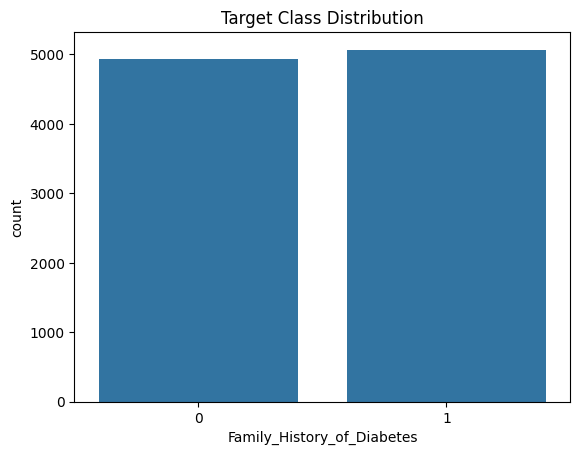

Family_History_of_Diabetes
1    5070
0    4930
Name: count, dtype: int64


In [27]:
#the above accuracy proves that the given data is not enough so as to predict the any family history of diabetes
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of the target
sns.countplot(x='Family_History_of_Diabetes', data=df)
plt.title('Target Class Distribution')
plt.show()

# Also print counts
print(df['Family_History_of_Diabetes'].value_counts())

#here 0 means no family history and 1 means there is family history o#f diabetes


In [31]:
#lets try XGBoost and try to find the accuracy (endemble learning)
from xgboost import XGBClassifier

xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)  # Use SMOTE data

# Predict and evaluate
from sklearn.metrics import accuracy_score

y_pred = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Test Accuracy: {accuracy*100:.2f}%")


Test Accuracy: 51.00%


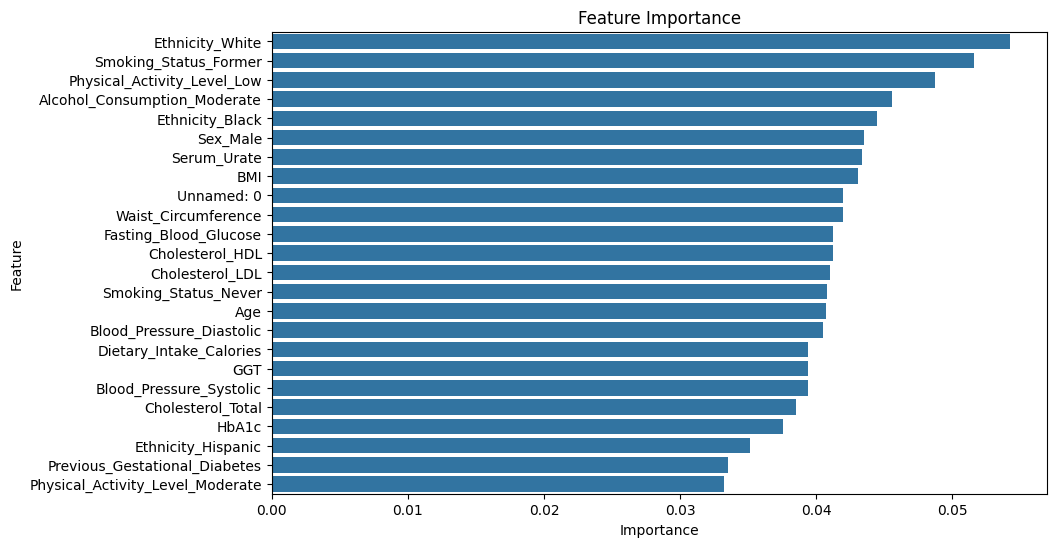

                         Feature  Importance
18               Ethnicity_White    0.054222
22         Smoking_Status_Former    0.051583
19   Physical_Activity_Level_Low    0.048727
21  Alcohol_Consumption_Moderate    0.045595
16               Ethnicity_Black    0.044489


In [32]:
#code for feature importance using XGBoost classifier
import numpy as np

# Fit the model again to get feature importance (Assuming X_train_smote is already defined)
model = XGBClassifier(random_state=42)
model.fit(X_train_smote, y_train_smote)

# Get feature importance
importance = model.feature_importances_

# Create a DataFrame for easier visualization
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importance
})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the top features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()

# Print the top features
print(feature_importance_df.head())


Accuracy: 50.13%
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.48      0.49      1511
           1       0.50      0.52      0.51      1489

    accuracy                           0.50      3000
   macro avg       0.50      0.50      0.50      3000
weighted avg       0.50      0.50      0.50      3000



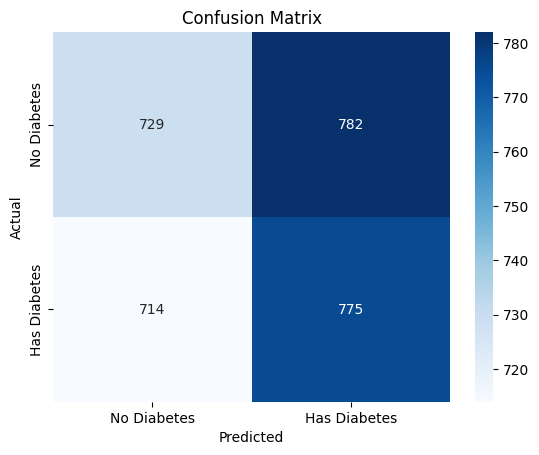

Top 10 Important Features:
                    Feature  Importance
0                Unnamed: 0    0.070324
10          Cholesterol_LDL    0.069718
11                      GGT    0.068804
13  Dietary_Intake_Calories    0.068480
3       Waist_Circumference    0.067811
8         Cholesterol_Total    0.066868
4     Fasting_Blood_Glucose    0.066417
9           Cholesterol_HDL    0.066405
2                       BMI    0.065177
6   Blood_Pressure_Systolic    0.061343


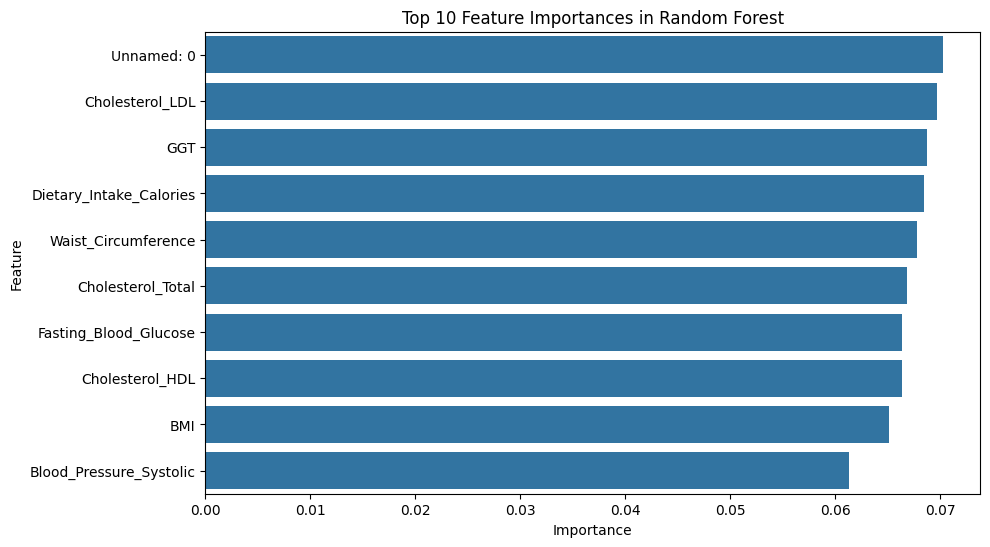

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Encode categorical features (Assuming columns like 'Sex', 'Physical_Activity_Level', etc.)
df = pd.get_dummies(df, drop_first=True)

# Split the data into features (X) and target (y)
X = df.drop(columns=['Family_History_of_Diabetes'])
y = df['Family_History_of_Diabetes']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize numerical features (if needed)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train_scaled, y_train)

# Predictions on the test set
y_pred = rf_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100:.2f}%')

# Detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Has Diabetes'], yticklabels=['No Diabetes', 'Has Diabetes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Feature Importance
feature_importances = rf_model.feature_importances_
features = X.columns

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top 10 important features
print("Top 10 Important Features:")
print(feature_importance_df.head(10))

# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
plt.title('Top 10 Feature Importances in Random Forest')
plt.show()